<a href="https://colab.research.google.com/github/gustavesg/Miscelanea/blob/main/Steepest_Descendent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks.  Training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates. Until the function is close to or equal to zero, the model will continue to adjust its parameters to yield the smallest possible error. Once machine learning models are optimized for accuracy, they can be powerful tools for artificial intelligence (AI) and computer science applications.

### The most basic gradient descend method is Steepest descendent method, where each interaction is of the form: $$x^{k+1} = x^{k} - \alpha^{k}D^{k}\triangledown f(x^{k}) $$

### where D^{k} = I

<ipython-input-25-f9d318fe6680>:49: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig_1.gca(projection="3d")


[array([[4.375, 1.875]]), array([[3.828125, 0.703125]]), array([[3.34960938, 0.26367188]]), array([[2.9309082 , 0.09887695]]), array([[2.56454468, 0.03707886]]), array([[2.24397659, 0.01390457]]), array([[1.96347952, 0.00521421]]), array([[1.71804458, 0.00195533]]), array([[1.50328901e+00, 7.33248889e-04]]), array([[1.31537788e+00, 2.74968334e-04]])]
X = (6.724290357989539e-05,8.271732731602634e-36)


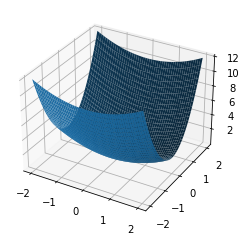

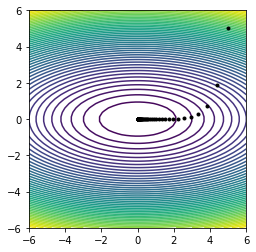

In [ ]:
#import libraries
from sympy import *
import numpy as np
from numpy import linalg as LA
import scipy.optimize as sopt
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

#declare variables in sympy
x = symbols('x')
y = symbols('y')

#declare function f
f = Matrix([0.5*x**2 + 2.5*y**2])

#define variable to calcule the jacobian
X = Matrix([x,y])

# jacobian matrix
J_x = f.jacobian(X)

#choose stepsize
alpha = 0.125

#storage estimates
guesses = []

# ----------------------------------------------------------------------------------------------------------------------------------
def steepest_descendent(x0):

  #first iteration 
  x_anterior = x0
  x_posterior = x_anterior - np.array(alpha*(J_x.evalf(subs = {x:x_anterior[0],y:x_anterior[1]})*(np.identity(2)))).astype(np.float64)

  #append  in lista of guesses
  guesses.append(x_posterior)

  #until to satisfy the convergence criteria 
  while LA.norm(x_posterior - x_anterior) > 10**-5:

    x_anterior = x_posterior
    x_posterior = x_anterior - np.array(alpha*(J_x.evalf(subs = {x:x_anterior[0][0],y:x_anterior[0][1]})*(np.identity(2)))).astype(np.float64)

    #append  in lista of guesses
    guesses.append(x_posterior)

  #make 3d graphic of function
  fig_1 = pt.figure()
  ax = fig_1.gca(projection="3d")

  #plot range
  xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]

  #calcule z coordinates
  def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

  fmesh = f(np.array([xmesh, ymesh]))

  #plot in 3d
  ax.plot_surface(xmesh, ymesh, fmesh)

  #make the level curves graph of function f
  fig_2 = pt.figure()
  ax = fig_2.gca()

  #plot range
  xmesh, ymesh = np.mgrid[-6:6:50j,-6:6:50j]

  #contour
  ax.set_aspect('equal')
  pt.contour(xmesh, ymesh, fmesh,50)
  it_array = np.array(guesses)

  #plot initial point
  pt.plot(x0[0],x0[1],".:k")

  #plot sucessive guesses 
  for i in range(len(guesses)):
    pt.plot(guesses[i][0][0],guesses[i][0][1],".:k")

  #display the numerical solution of minimazation problem
  return f'X = ({x_posterior[0][0]},{x_posterior[0][1]})'

#choose initial point
x_inicial = np.array([5,5])

#runs function
print(steepest_descendent(x_inicial))
